## Load the Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with low_memory set to False to avoid Dtype warnings
data_path = 'Dataset-PT.csv'
df = pd.read_csv(data_path, low_memory=False)


# Basic Data Inspection

In [3]:
# Display the first few rows to understand the data
print(df.head())

# Basic statistics for numerical data
print(df.describe())

# Check for any missing values
print(df.isnull().sum())

   Calendar_date  route_id  bus_id  stop_sequence  arrival_delay  dwell_time  \
0       20220108         4   41344              1            151           0   
1       20220108         4   41344              2            185          24   
2       20220108         4   41344              3            186           0   
3       20220108         4   41344              4            202          12   
4       20220108         4   41344              5            242          21   

   travel_time_for_previous_section  scheduled_travel_time  \
0                                 0                    120   
1                               171                     45   
2                                55                     41   
3                                42                     94   
4                                98                     86   

   upstream_stop_delay  origin_delay  ...  factor(weather)Rain  \
0                  100           100  ...                    0   
1             

# Calculate Descriptive Statistics for Delays

In [4]:
# Focus on 'arrival_delay' column
arrival_delays = df['arrival_delay']

# Calculate mean, median, and standard deviation
print("Mean Delay:", arrival_delays.mean())
print("Median Delay:", arrival_delays.median())
print("Standard Deviation of Delays:", arrival_delays.std())


Mean Delay: 134.9722382742344
Median Delay: 88.0
Standard Deviation of Delays: 193.89948727756183


# Visualization

## A-Histogram of Arrival Delays

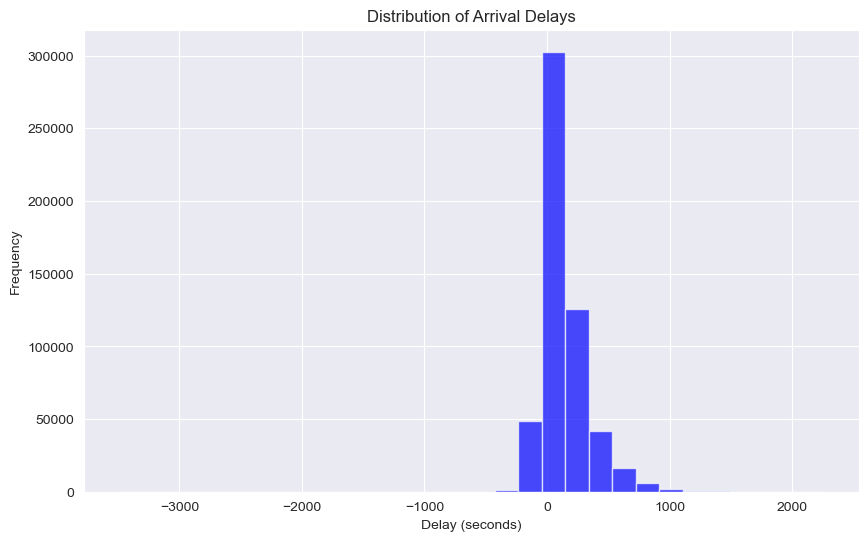

In [5]:
# Plot a histogram of arrival delays
plt.figure(figsize=(10, 6))
plt.hist(arrival_delays, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Delay (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## b. Delays Over Time

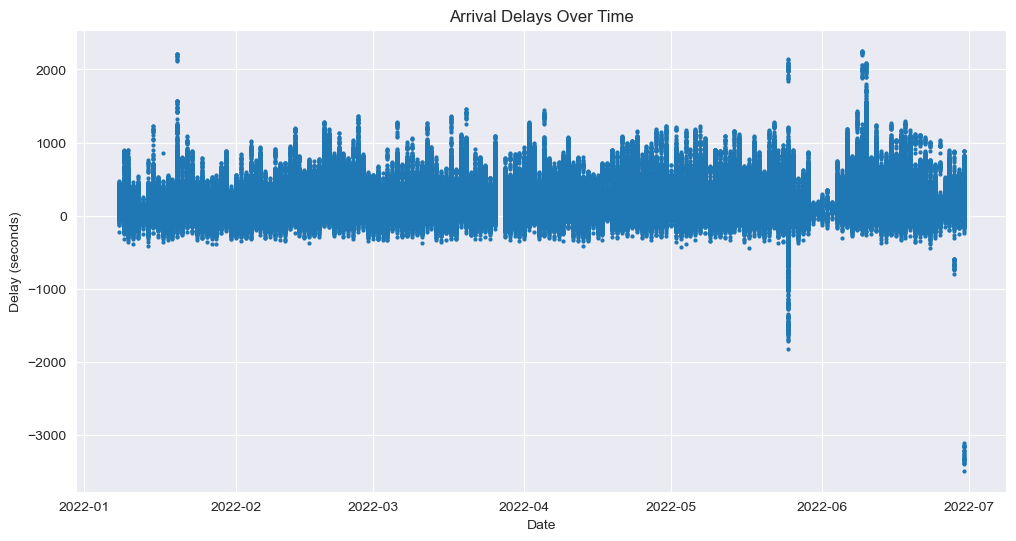

In [6]:
# Convert 'calendar_date' to datetime
df['Calendar_date'] = pd.to_datetime(df['Calendar_date'], format='%Y%m%d')

# Plot delays over time
plt.figure(figsize=(12, 6))
plt.plot(df['Calendar_date'], df['arrival_delay'], marker='o', linestyle='', markersize=2)
plt.title('Arrival Delays Over Time')
plt.xlabel('Date')
plt.ylabel('Delay (seconds)')
plt.grid(True)
plt.show()


## c. Delays Across Different Stops

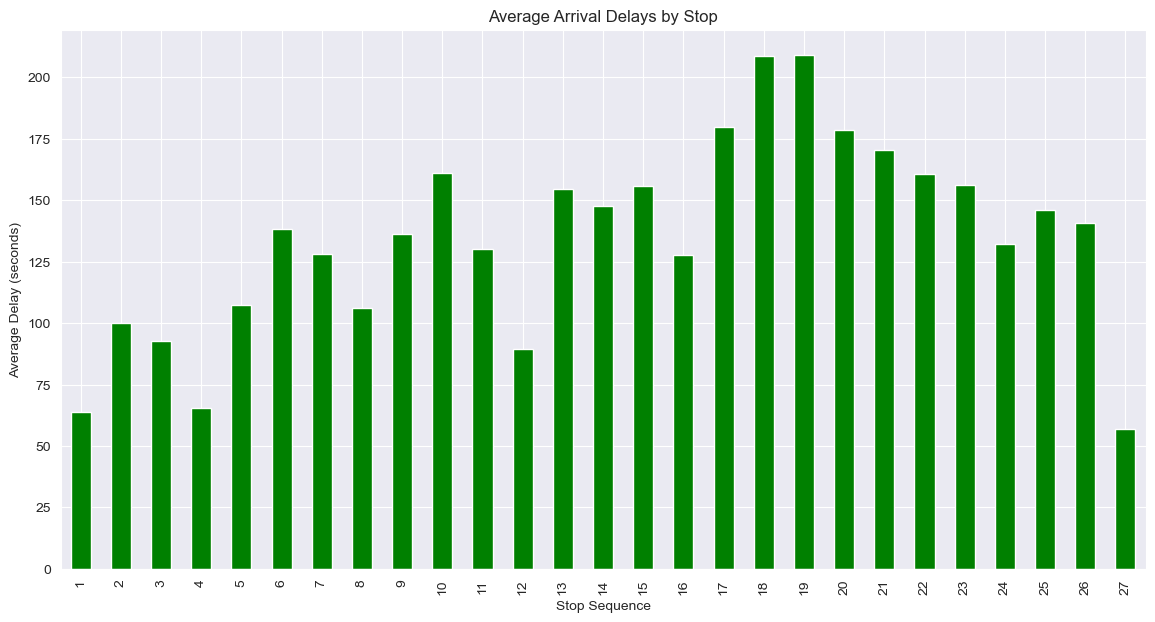

In [7]:

stop_delays = df.groupby('stop_sequence')['arrival_delay'].mean()

# Plot average delay for each stop
plt.figure(figsize=(14, 7))
stop_delays.plot(kind='bar', color='green')
plt.title('Average Arrival Delays by Stop')
plt.xlabel('Stop Sequence')  # Update this label accordingly
plt.ylabel('Average Delay (seconds)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()



## d- Histogrtams

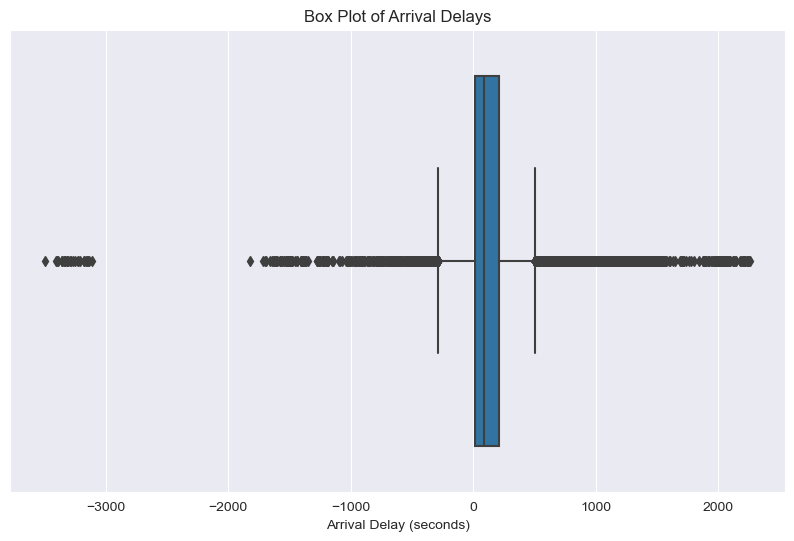

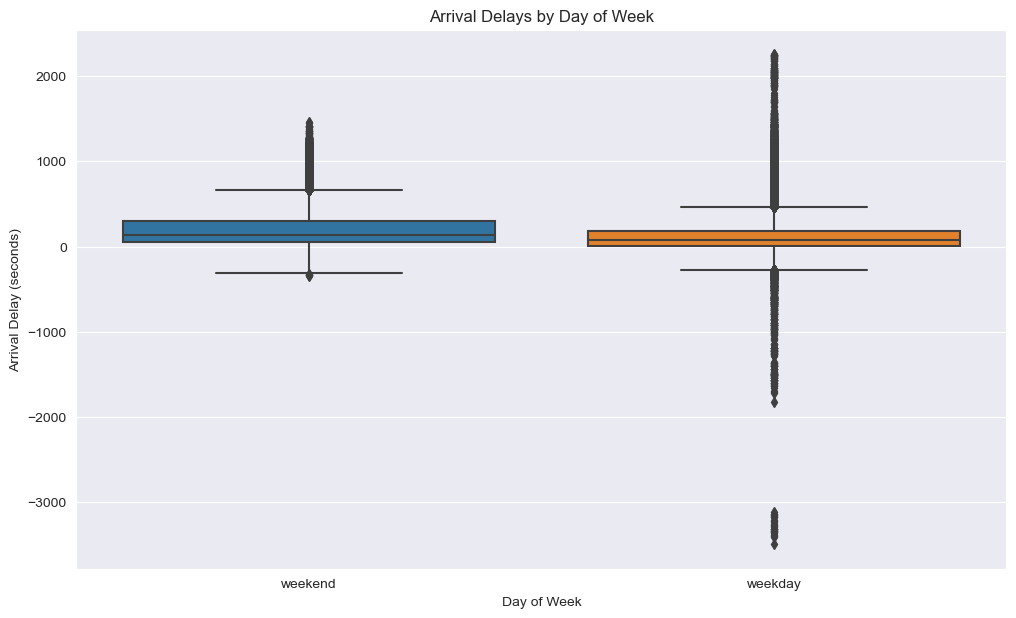

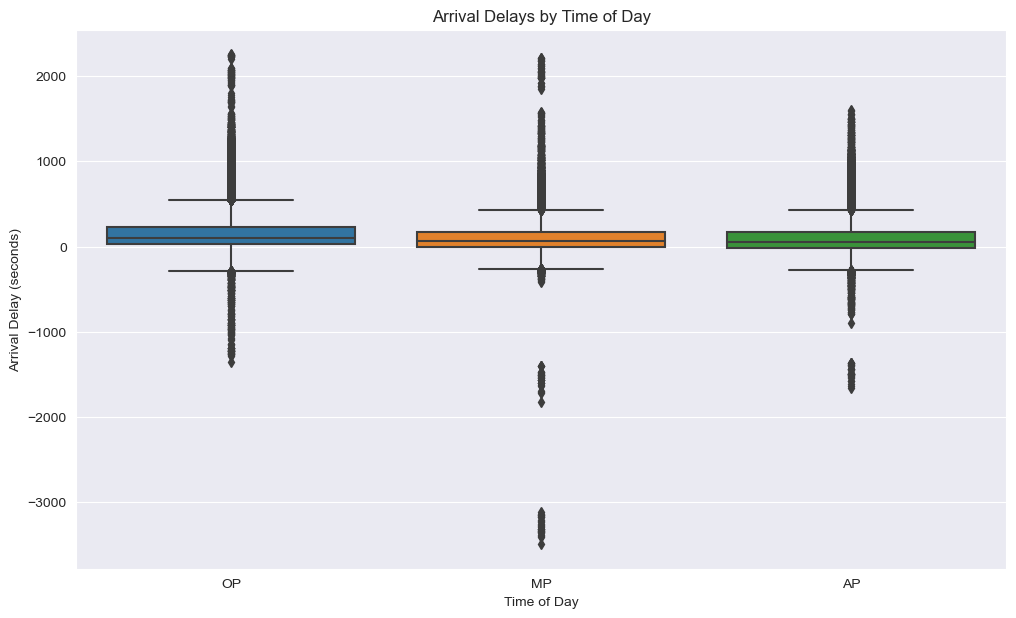

In [8]:
import seaborn as sns  # Import seaborn for better visualizations

# Simple box plot for arrival delays
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['arrival_delay'])
plt.title('Box Plot of Arrival Delays')
plt.xlabel('Arrival Delay (seconds)')
plt.show()

# Box plot of arrival delays grouped by day of the week
# Ensure 'day_of_week' is the correct column name for days
plt.figure(figsize=(12, 7))
sns.boxplot(x='day_of_week', y='arrival_delay', data=df)
plt.title('Arrival Delays by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Arrival Delay (seconds)')
plt.show()

# Box plot of arrival delays grouped by time of day
# Ensure 'time_of_day' is the correct column name for time categories
plt.figure(figsize=(12, 7))
sns.boxplot(x='time_of_day', y='arrival_delay', data=df)
plt.title('Arrival Delays by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Arrival Delay (seconds)')
plt.show()


## Feature Engineering

In [14]:
df = df.drop(['weather','temperature','day_of_week','time_of_day'], axis=1)

In [15]:
corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

arrival_delay                        1.000000
upstream_stop_delay                  0.975019
origin_delay                         0.716324
previous_bus_delay                   0.265434
factor(day_of_week)weekend           0.190783
is_weekend                           0.178324
factor(time_of_day)Off-peak          0.138109
Calendar_date                        0.132105
month                                0.128526
stop_sequence                        0.092616
dwell_time                           0.089433
travel_time_for_previous_section     0.081113
factor(weather)Normal                0.022642
factor(temperature)Normal            0.022444
factor(weather)Rain                  0.010833
factor(weather)Snow                 -0.001579
factor(weather)Light_Snow           -0.012642
bus_id                              -0.012769
factor(temperature)Cold             -0.013595
factor(temperature)Extra_cold       -0.024602
factor(weather)Light_Rain           -0.027323
previous_trip_travel_time         

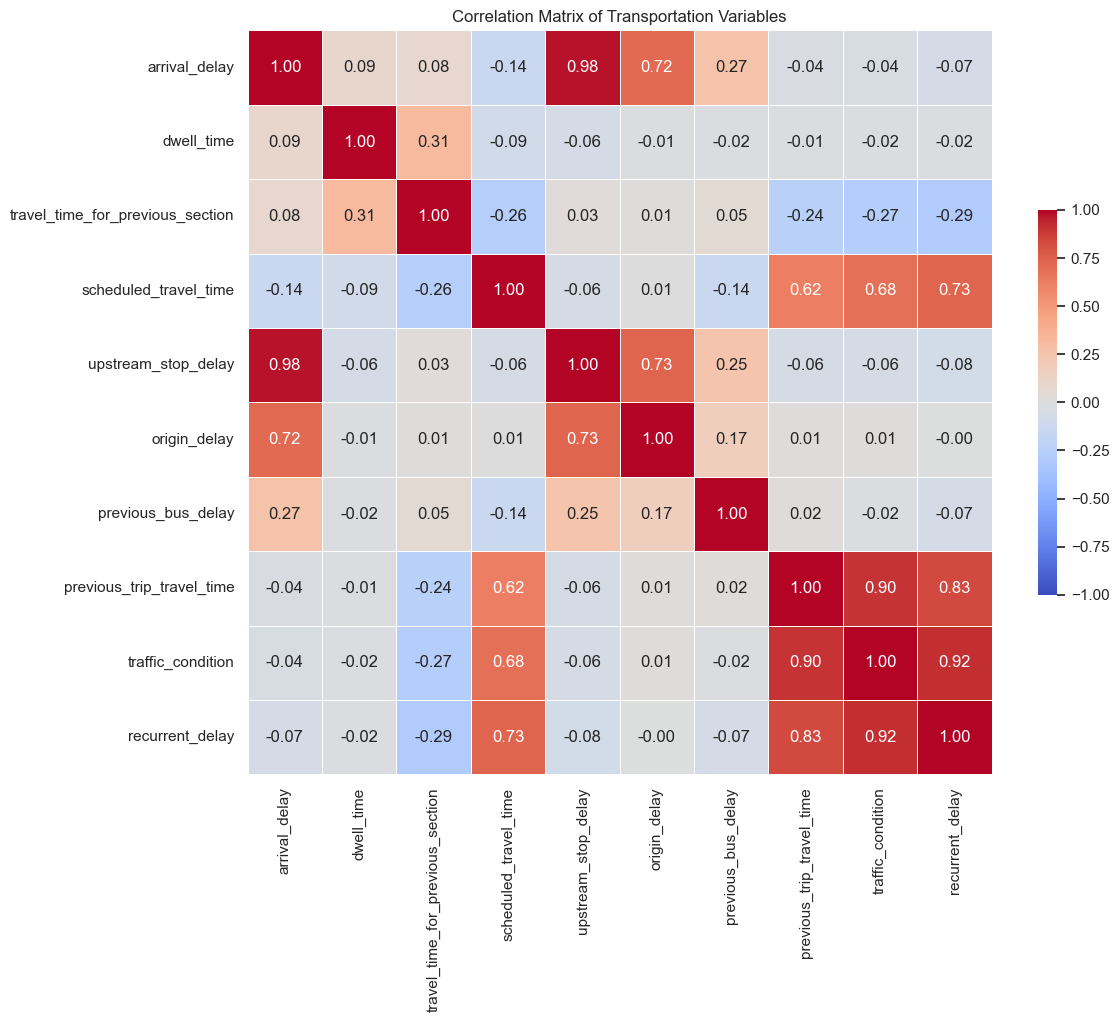

In [25]:
columns = ['arrival_delay', 'dwell_time', 'travel_time_for_previous_section', 'scheduled_travel_time',
           'upstream_stop_delay', 'origin_delay', 'previous_bus_delay', 'previous_trip_travel_time',
           'traffic_condition', 'recurrent_delay']

# Compute the correlation matrix
corr_matrix = df[columns].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Transportation Variables')
plt.show()


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


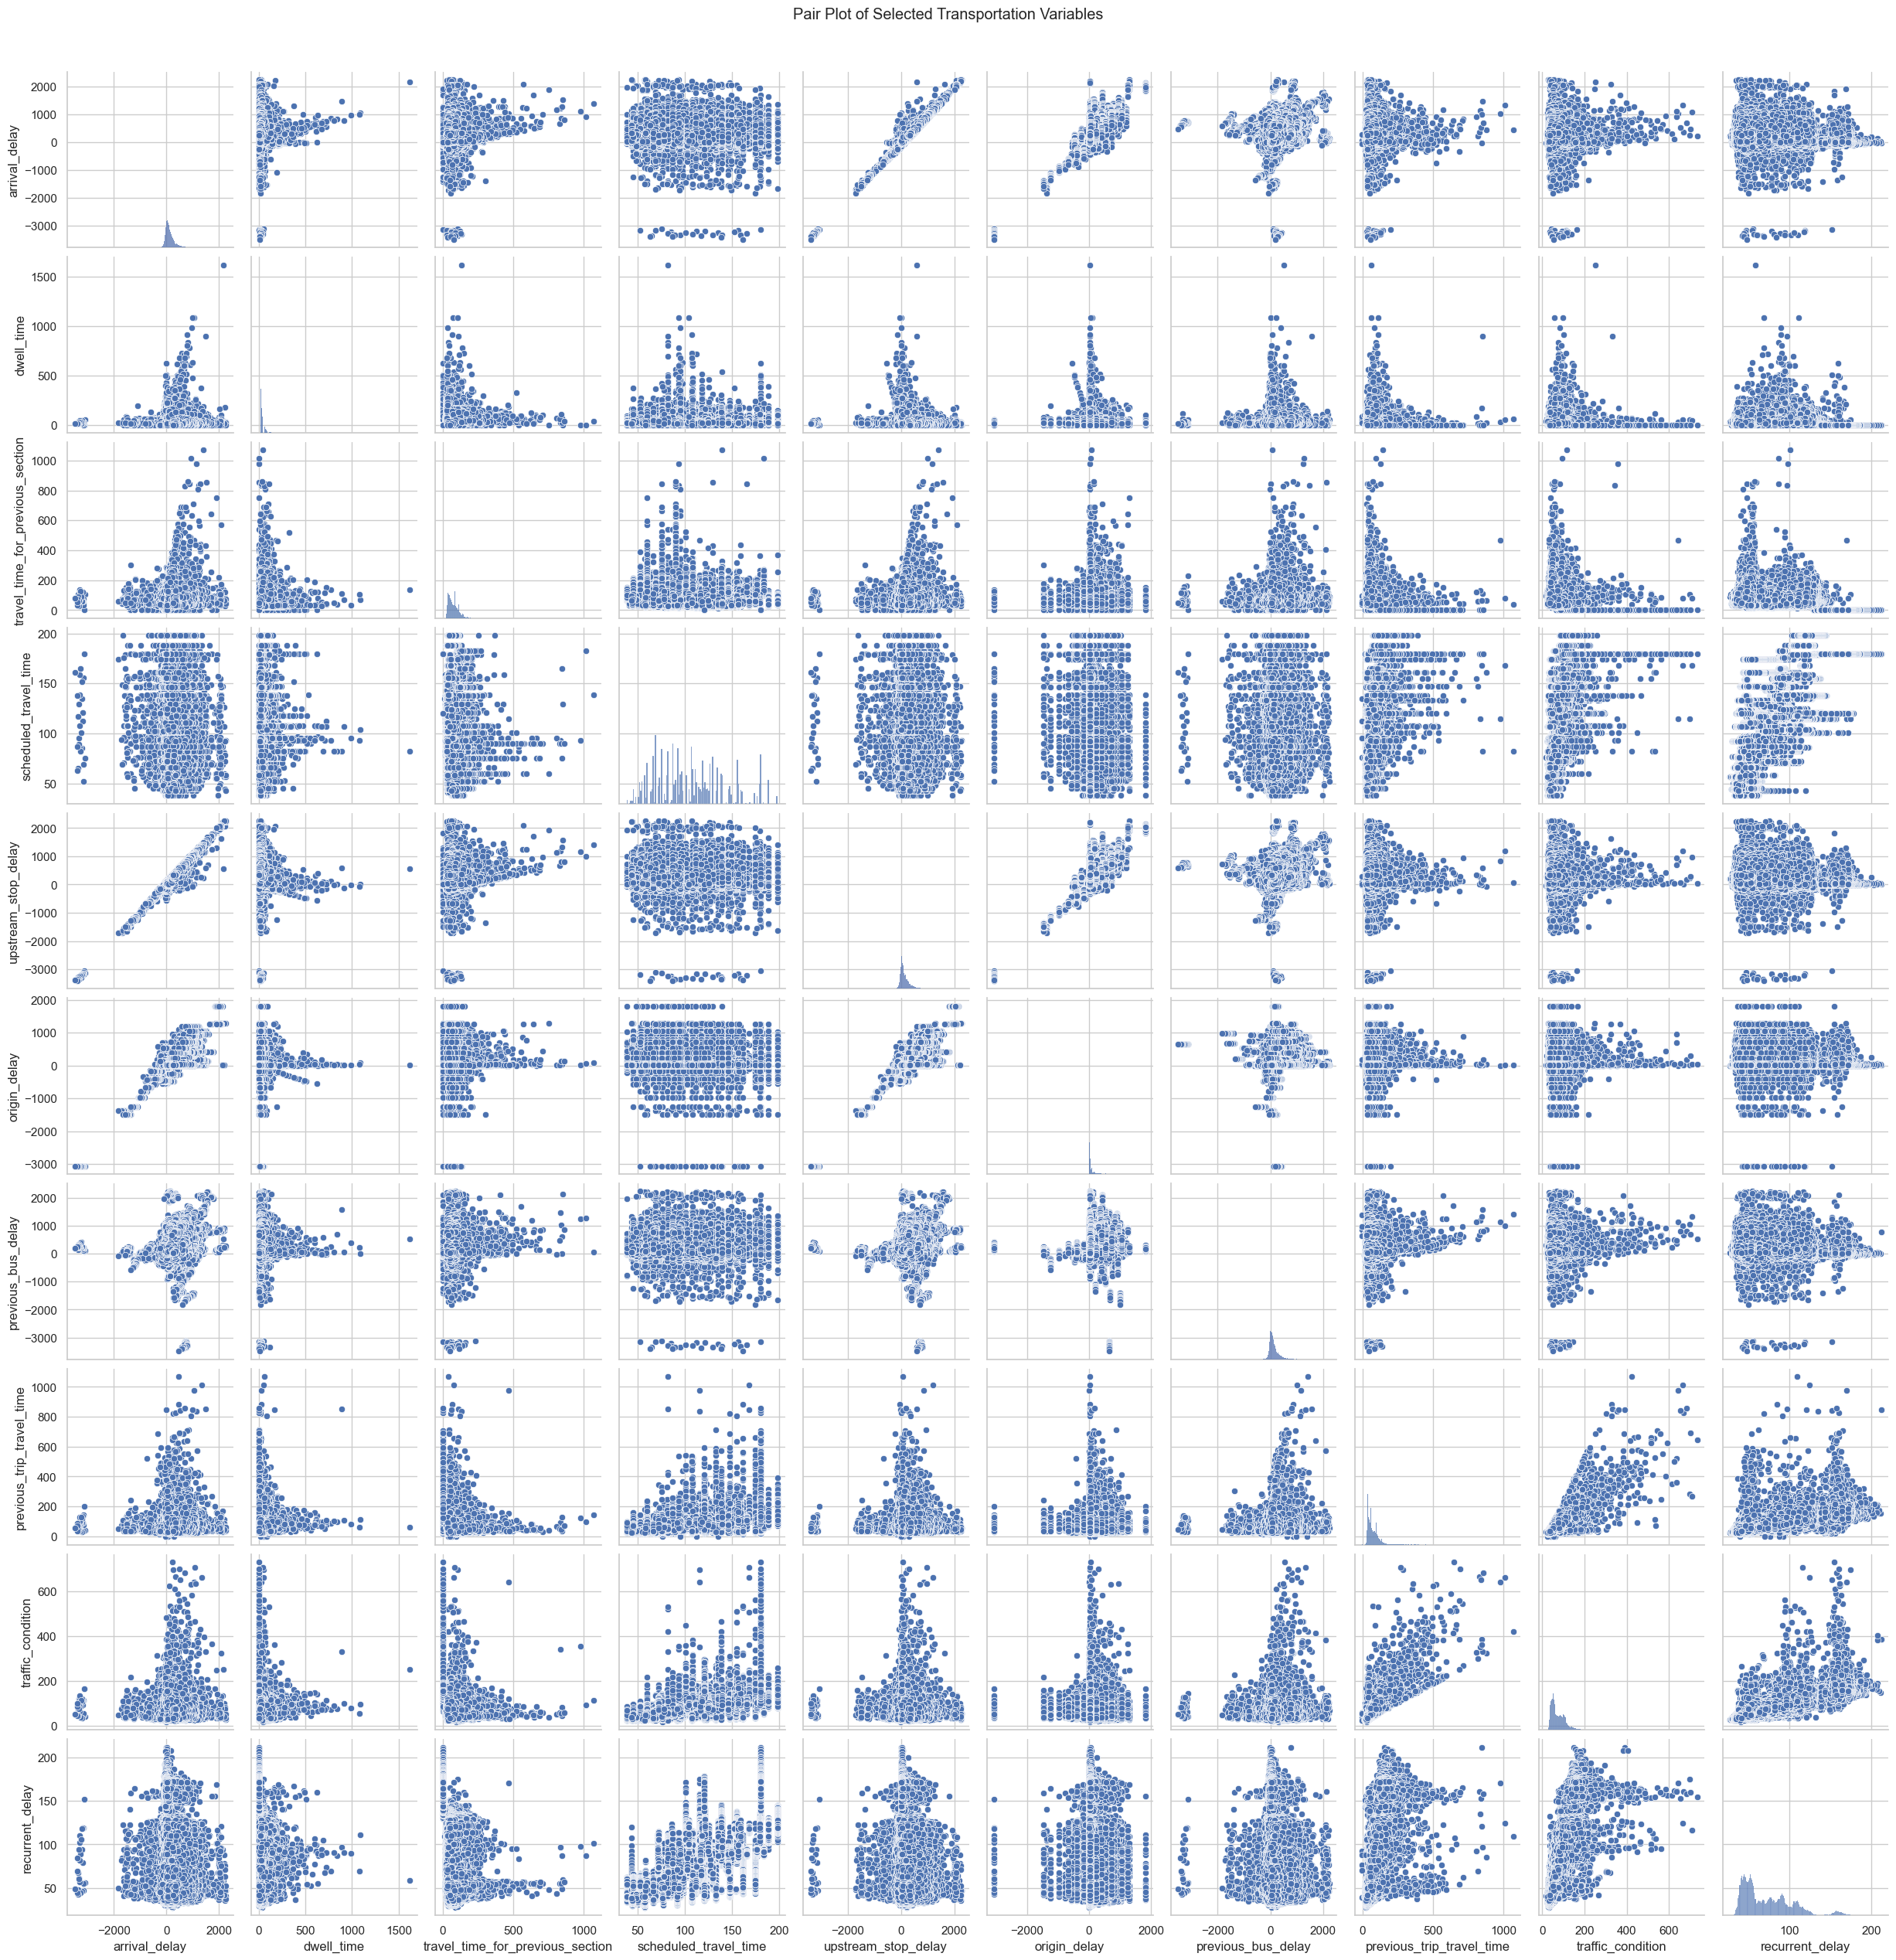

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# List of specific columns you want to include in the pair plot
selected_columns = [
    'arrival_delay', 'dwell_time', 'travel_time_for_previous_section', 'scheduled_travel_time',
    'upstream_stop_delay', 'origin_delay', 'previous_bus_delay', 'previous_trip_travel_time',
    'traffic_condition', 'recurrent_delay']


# Creating a new DataFrame with only the selected columns
x_selected = df[selected_columns]

# Setting up the visual style with Seaborn
sns.set(style="whitegrid")

# Creating the pair plot for the selected variables
pairplot = sns.pairplot(x_selected)

# Enhancing the plot with titles and labels
pairplot.fig.suptitle('Pair Plot of Selected Transportation Variables', y=1.02)  # Adjust the title and position

# Showing the plot
plt.show()


# Point-Biserial Correlation for CatergoricaL Variables

In [24]:
import pandas as pd
from scipy.stats import pointbiserialr

# Assuming 'df' is your DataFrame

# List of categorical variables
categorical_vars = [
    'factor(weather)Light_Rain', 'factor(weather)Light_Snow', 'factor(weather)Normal',
    'factor(weather)Rain', 'factor(weather)Snow', 'factor(temperature)Cold',
    'factor(temperature)Extra_cold', 'factor(temperature)Normal', 'factor(day_of_week)weekday',
    'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak', 'factor(time_of_day)Morning_peak',
    'factor(time_of_day)Off-peak'
]

# Calculate Point-Biserial Correlation for each categorical variable with 'arrival_delay'
results = {}
for var in categorical_vars:
    correlation, p_value = pointbiserialr(df[var], df['arrival_delay'])
    results[var] = (correlation, p_value)

# Display the results
for key, value in results.items():
    print(f"{key}: Correlation = {value[0]}, P-value = {value[1]}")


factor(weather)Light_Rain: Correlation = -0.02732269036565723, P-value = 1.5795689392302992e-90
factor(weather)Light_Snow: Correlation = -0.01264203833327193, P-value = 1.0184672695868808e-20
factor(weather)Normal: Correlation = 0.022642081841163474, P-value = 9.530364701355166e-63
factor(weather)Rain: Correlation = 0.010833113208200879, P-value = 1.2602380883335888e-15
factor(weather)Snow: Correlation = -0.001578657119317014, P-value = 0.24380135735992642
factor(temperature)Cold: Correlation = -0.01359537109960147, P-value = 1.0370216501159714e-23
factor(temperature)Extra_cold: Correlation = -0.0246021255062007, P-value = 9.468307141605155e-74
factor(temperature)Normal: Correlation = 0.022444223537319265, P-value = 1.0948363880001211e-61
factor(day_of_week)weekday: Correlation = -0.1907825872290833, P-value = 0.0
factor(day_of_week)weekend: Correlation = 0.1907825872290833, P-value = 0.0
factor(time_of_day)Afternoon_peak: Correlation = -0.09194581922150237, P-value = 0.0
factor(time_o

# Categorical Variables Correlation (Cramer's V)

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramér's V statistic for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))



# List of variables to analyze
variables = [
    'factor(weather)Light_Rain', 'factor(weather)Light_Snow', 'factor(weather)Normal',
    'factor(weather)Rain', 'factor(weather)Snow', 'factor(temperature)Cold',
    'factor(temperature)Extra_cold', 'factor(temperature)Normal', 'factor(day_of_week)weekday',
    'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak', 'factor(time_of_day)Morning_peak',
    'factor(time_of_day)Off-peak'
]

# Initialize an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

# Calculate Cramér's V for each pair of variables
for var1 in variables:
    for var2 in variables:
        cramers_v_matrix.loc[var1, var2] = cramers_v(df[var1], df[var2])


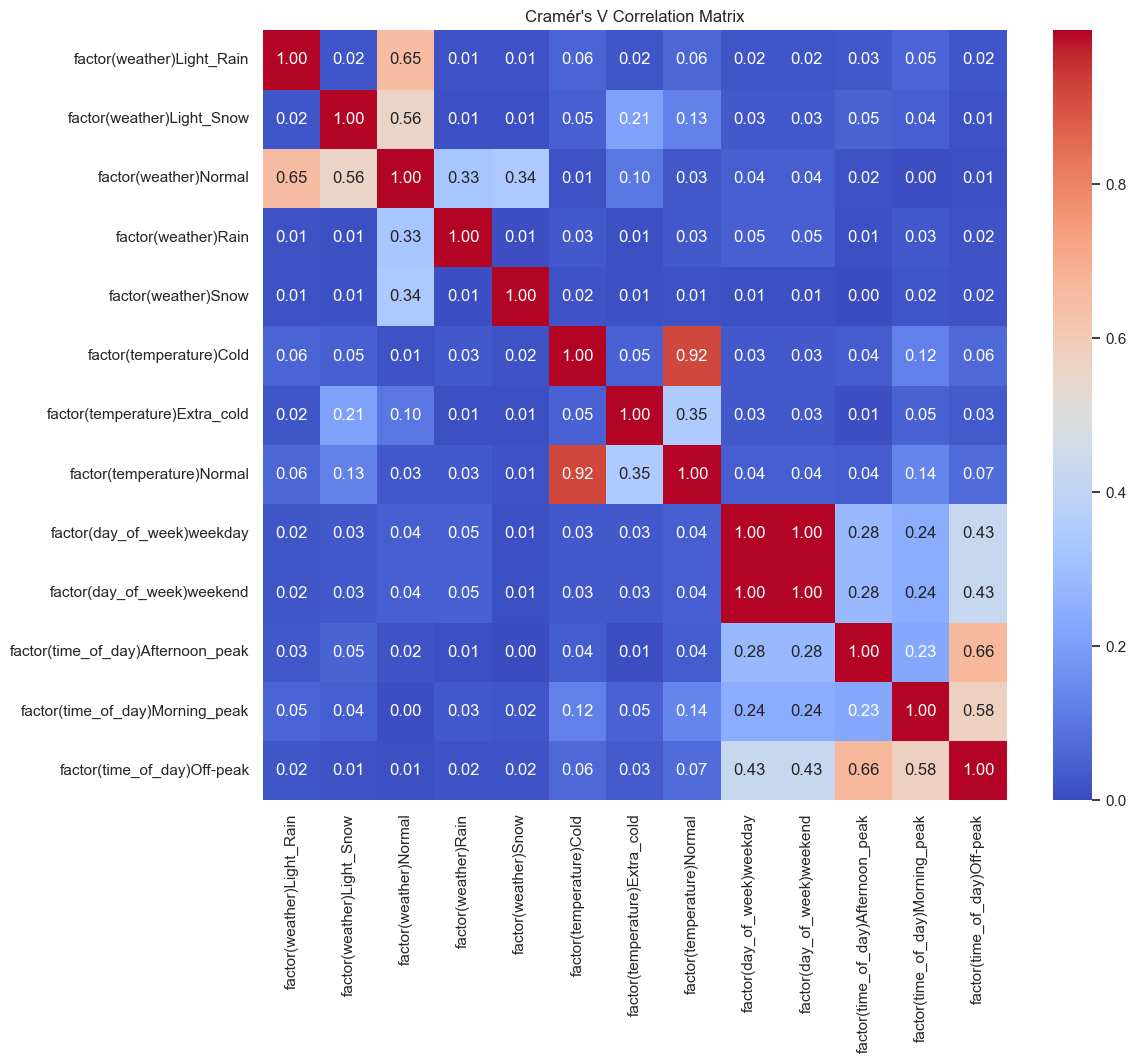

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Cramér\'s V Correlation Matrix')
plt.show()
